In [353]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [354]:
from sklearn.neighbors import KNeighborsClassifier

In [355]:
df=pd.read_csv('heart.csv')

In [356]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [358]:
df.shape

(303, 14)

In [359]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [360]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [361]:
df['restecg'].nunique()

3

In [362]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [363]:
df['thalach'].nunique()

91

In [364]:
df['exang'].nunique()

2

In [365]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [366]:
df['oldpeak'].nunique()

40

In [367]:
df['oldpeak'].head()

0    2.3
1    3.5
2    1.4
3    0.8
4    0.6
Name: oldpeak, dtype: float64

In [368]:
df['slope'].nunique()

3

In [369]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [370]:
df['ca'].nunique()

5

In [371]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [372]:
df['thal'].nunique()

4

In [373]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [374]:
df['target'].nunique()

2

In [375]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

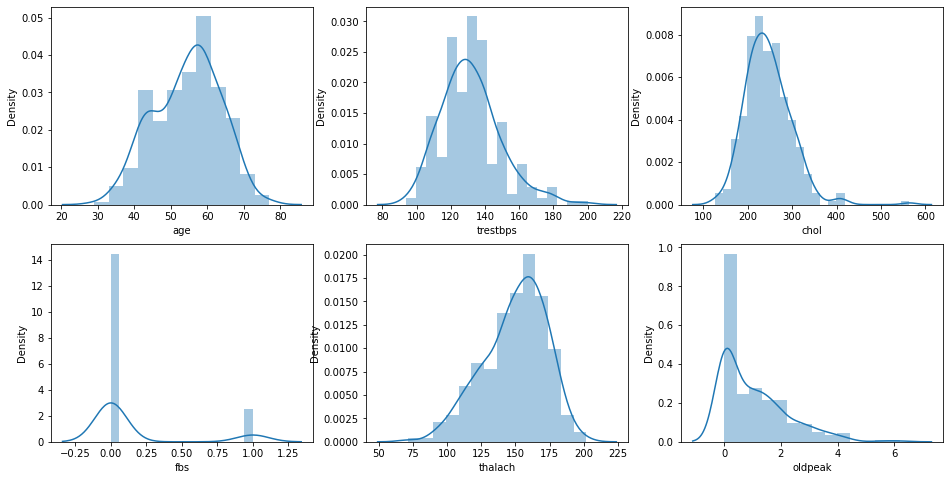

In [377]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.distplot(df['age'])

plt.subplot(2,3,2)
sns.distplot(df['trestbps'])

plt.subplot(2,3,3)
sns.distplot(df['chol'])

plt.subplot(2,3,4)
sns.distplot(df['fbs'])

plt.subplot(2,3,5)
sns.distplot(df['thalach'])

plt.subplot(2,3,6)
sns.distplot(df['oldpeak'])

In [378]:
highest = df['age'].mean() + 3*np.std(df['age'])
lowest = df['age'].mean() - 3*np.std(df['age'])

In [379]:
highest

81.56764154939698

In [380]:
lowest

27.16503171792975

In [381]:
df['age'].mean()

54.366336633663366

In [382]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [383]:
df[(df['age'] > highest)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [384]:
df[(df['age'] < lowest)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [385]:
df[(df['age'] > highest) | (df['age']<lowest)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


i.e.there are no outliers in 'age' feature 

In [386]:
percentile25=df['trestbps'].quantile(0.25)
percentile75=df['trestbps'].quantile(0.75)

In [387]:
percentile25

120.0

In [388]:
percentile75

140.0

In [389]:
iqr=percentile75 - percentile25

In [390]:
iqr

20.0

In [391]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [392]:
upper_limit

170.0

In [393]:
lower_limit

90.0

In [394]:
outliers = df[(df['trestbps'] > upper_limit) | (df['trestbps'] < lower_limit)]

In [395]:
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [396]:
df['new_trestbps'] = np.where(
    df['trestbps']>upper_limit,
    upper_limit,
    np.where(
        df['trestbps']<lower_limit,
        lower_limit,
        df['trestbps']
    )
)

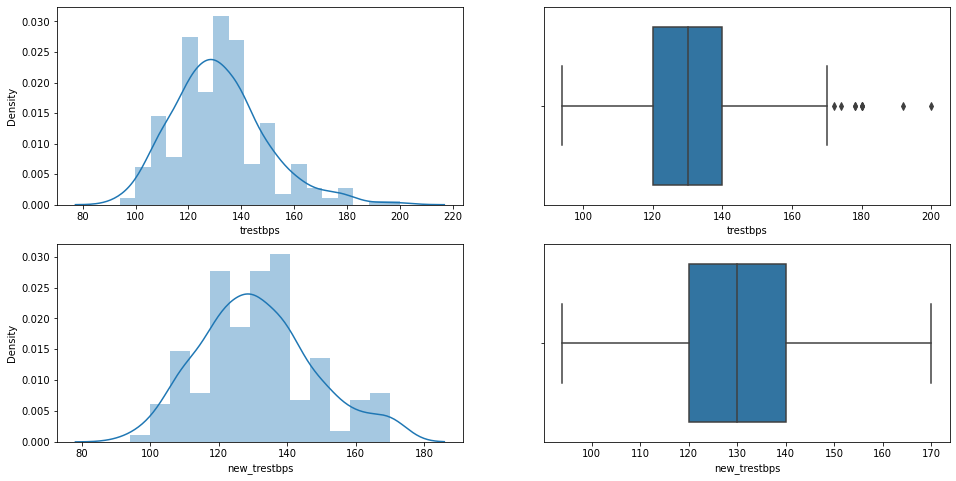

In [397]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['trestbps'])

plt.subplot(2,2,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,2,3)
sns.distplot(df['new_trestbps'])

plt.subplot(2,2,4)
sns.boxplot(df['new_trestbps'])

plt.show()

In [398]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,145.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,130.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,130.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,120.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,120.0


In [399]:
df.drop(columns=['trestbps'],inplace=True)

In [400]:
percentile25=df['chol'].quantile(0.25)
percentile75=df['chol'].quantile(0.75)
iqr=percentile75 - percentile25

In [401]:
percentile25

211.0

In [402]:
percentile75

274.5

In [403]:
iqr

63.5

In [404]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [405]:
upper_limit

369.75

In [406]:
lower_limit

115.75

In [407]:
outliers = df[(df['chol'] > upper_limit) | (df['chol'] < lower_limit)]

In [408]:
outliers

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps
28,65,0,2,417,1,0,157,0,0.8,2,1,2,1,140.0
85,67,0,2,564,0,0,160,0,1.6,1,0,3,1,115.0
96,62,0,0,394,0,0,157,0,1.2,1,0,2,1,140.0
220,63,0,0,407,0,0,154,0,4.0,1,3,3,0,150.0
246,56,0,0,409,0,0,150,1,1.9,1,2,3,0,134.0


In [409]:
df['new_chol'] = np.where(
    df['chol']>upper_limit,
    upper_limit,
    np.where(
        df['chol']<lower_limit,
        lower_limit,
        df['chol']
    )
)

In [410]:
df.head()

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol
0,63,1,3,233,1,0,150,0,2.3,0,0,1,1,145.0,233.0
1,37,1,2,250,0,1,187,0,3.5,0,0,2,1,130.0,250.0
2,41,0,1,204,0,0,172,0,1.4,2,0,2,1,130.0,204.0
3,56,1,1,236,0,1,178,0,0.8,2,0,2,1,120.0,236.0
4,57,0,0,354,0,1,163,1,0.6,2,0,2,1,120.0,354.0


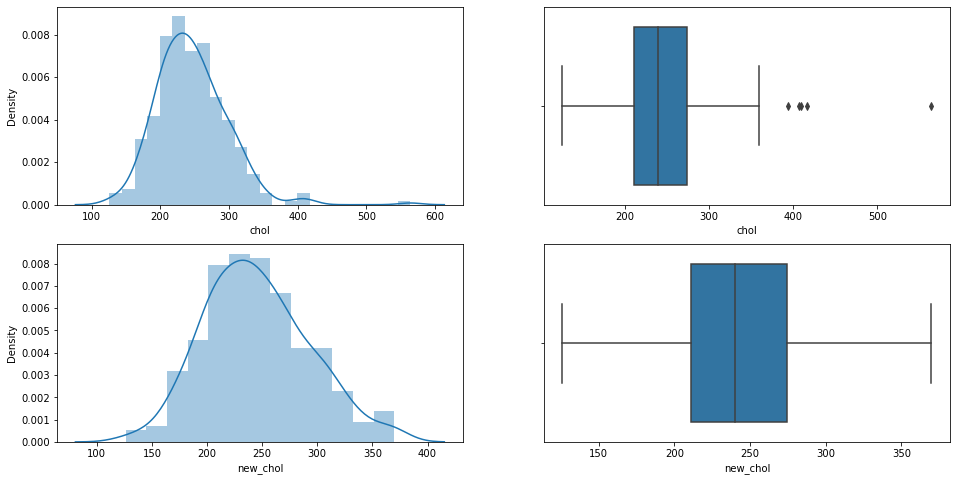

In [411]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['chol'])

plt.subplot(2,2,2)
sns.boxplot(df['chol'])

plt.subplot(2,2,3)
sns.distplot(df['new_chol'])

plt.subplot(2,2,4)
sns.boxplot(df['new_chol'])

plt.show()

In [412]:
df.drop(columns = ['chol'],inplace=True)

In [413]:
df.head()

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol
0,63,1,3,1,0,150,0,2.3,0,0,1,1,145.0,233.0
1,37,1,2,0,1,187,0,3.5,0,0,2,1,130.0,250.0
2,41,0,1,0,0,172,0,1.4,2,0,2,1,130.0,204.0
3,56,1,1,0,1,178,0,0.8,2,0,2,1,120.0,236.0
4,57,0,0,0,1,163,1,0.6,2,0,2,1,120.0,354.0


In [414]:
percentile25=df['thalach'].quantile(0.25)
percentile75=df['thalach'].quantile(0.75)
iqr=percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
outliers = df[(df['thalach'] > upper_limit) | (df['thalach'] < lower_limit)]

In [415]:
df.describe()

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,131.280528,245.134488
std,9.082101,0.466011,1.032052,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,16.582241,47.552910
min,29.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,126.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,120.000000,211.000000
50%,55.000000,1.000000,1.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,130.000000,240.000000
75%,61.000000,1.000000,2.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,140.000000,274.500000
max,77.000000,1.000000,3.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,170.000000,369.750000


In [416]:
outliers

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol
272,67,1,0,0,1,71,0,1.0,1,0,2,0,120.0,237.0


In [417]:
df['new_thalach'] = np.where(
    df['thalach']>upper_limit,
    upper_limit,
    np.where(
        df['thalach']<lower_limit,
        lower_limit,
        df['thalach']
    )
)

In [418]:
df.head()

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol,new_thalach
0,63,1,3,1,0,150,0,2.3,0,0,1,1,145.0,233.0,150.0
1,37,1,2,0,1,187,0,3.5,0,0,2,1,130.0,250.0,187.0
2,41,0,1,0,0,172,0,1.4,2,0,2,1,130.0,204.0,172.0
3,56,1,1,0,1,178,0,0.8,2,0,2,1,120.0,236.0,178.0
4,57,0,0,0,1,163,1,0.6,2,0,2,1,120.0,354.0,163.0


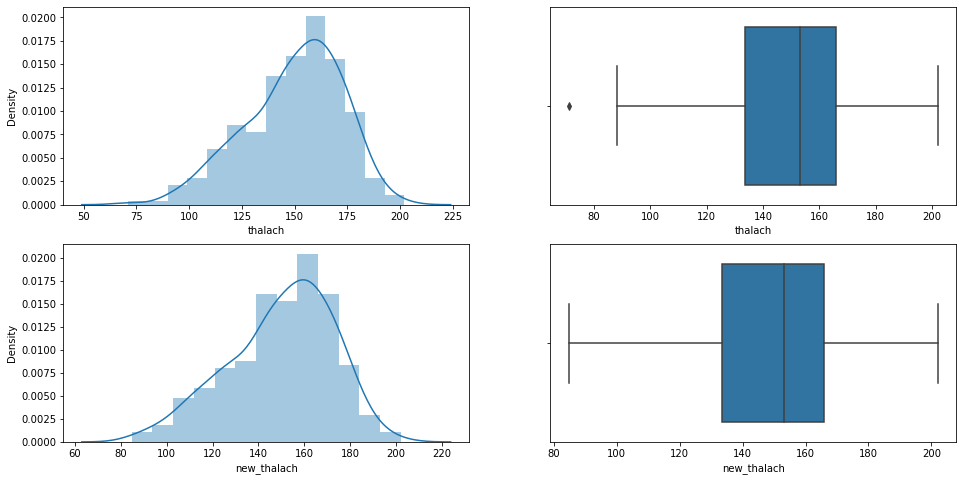

In [419]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['thalach'])

plt.subplot(2,2,2)
sns.boxplot(df['thalach'])

plt.subplot(2,2,3)
sns.distplot(df['new_thalach'])

plt.subplot(2,2,4)
sns.boxplot(df['new_thalach'])

plt.show()

In [420]:
percentile25=df['oldpeak'].quantile(0.25)
percentile75=df['oldpeak'].quantile(0.75)
iqr=percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
outliers = df[(df['oldpeak'] > upper_limit) | (df['oldpeak'] < lower_limit)]

In [421]:
outliers

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol,new_thalach
101,59,1,3,0,0,145,0,4.2,0,0,3,1,170.0,270.0,145.0
204,62,0,0,0,0,145,0,6.2,0,3,3,0,160.0,164.0,145.0
221,55,1,0,0,1,111,1,5.6,0,0,3,0,140.0,217.0,111.0
250,51,1,0,0,1,122,1,4.2,1,3,3,0,140.0,298.0,122.0
291,58,1,0,0,2,140,0,4.4,0,3,1,0,114.0,318.0,140.0


In [422]:
df['new_oldpeak'] = np.where(
    df['oldpeak']>upper_limit,
    upper_limit,
    np.where(
        df['oldpeak']<lower_limit,
        lower_limit,
        df['oldpeak']
    )
)

In [423]:
df.head()

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_trestbps,new_chol,new_thalach,new_oldpeak
0,63,1,3,1,0,150,0,2.3,0,0,1,1,145.0,233.0,150.0,2.3
1,37,1,2,0,1,187,0,3.5,0,0,2,1,130.0,250.0,187.0,3.5
2,41,0,1,0,0,172,0,1.4,2,0,2,1,130.0,204.0,172.0,1.4
3,56,1,1,0,1,178,0,0.8,2,0,2,1,120.0,236.0,178.0,0.8
4,57,0,0,0,1,163,1,0.6,2,0,2,1,120.0,354.0,163.0,0.6


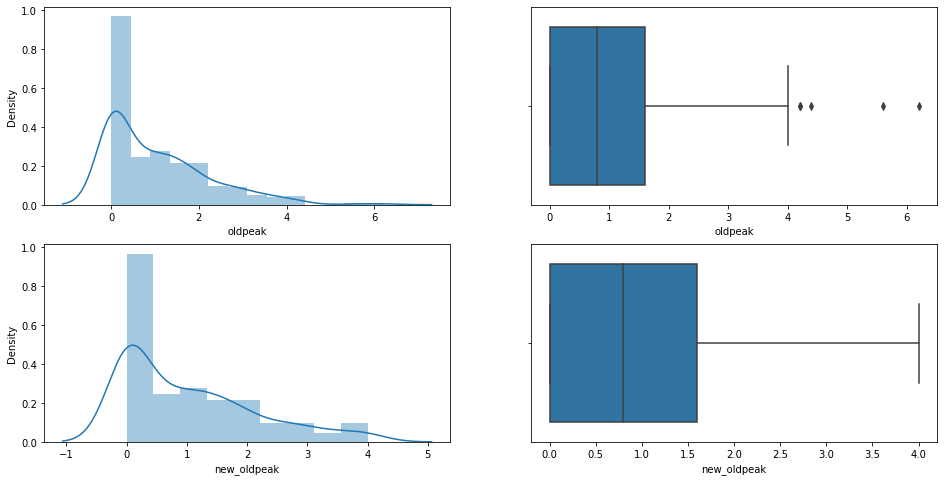

In [424]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['oldpeak'])

plt.subplot(2,2,2)
sns.boxplot(df['oldpeak'])

plt.subplot(2,2,3)
sns.distplot(df['new_oldpeak'])

plt.subplot(2,2,4)
sns.boxplot(df['new_oldpeak'])

plt.show()

In [425]:
df.drop(columns=['thalach','oldpeak'],inplace=True)

In [426]:
df.head()

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,target,new_trestbps,new_chol,new_thalach,new_oldpeak
0,63,1,3,1,0,0,0,0,1,1,145.0,233.0,150.0,2.3
1,37,1,2,0,1,0,0,0,2,1,130.0,250.0,187.0,3.5
2,41,0,1,0,0,0,2,0,2,1,130.0,204.0,172.0,1.4
3,56,1,1,0,1,0,2,0,2,1,120.0,236.0,178.0,0.8
4,57,0,0,0,1,1,2,0,2,1,120.0,354.0,163.0,0.6


In [427]:
X=df.drop(columns=['target'])
y=df['target']

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42, stratify = y)

In [429]:
X_train.shape

(242, 13)

In [430]:
X_test.shape

(61, 13)

In [431]:
y_train.shape

(242,)

In [432]:
y_test.shape

(61,)

In [433]:
model=KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [434]:
accuracy_score(y_test,y_pred)

0.639344262295082

In [435]:
y_pred_train = model.predict(X_train) 
accuracy_score(y_train,y_pred_train)

0.756198347107438

#### Hyperparameter Tuning

In [436]:
hyp = {'n_neighbors':np.arange(1,21),
      'p':[1,2]}
gscv = GridSearchCV(model, hyp, cv=5)
gscv.fit(X_train, y_train)
gscv.best_params_

{'n_neighbors': 8, 'p': 1}

In [437]:
model = KNeighborsClassifier(n_neighbors=8,p=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [438]:
accuracy_score(y_test,y_pred)

0.6065573770491803

In [439]:
y_pred_train = model.predict(X_train) 
accuracy_score(y_train,y_pred_train)

0.7644628099173554

In [440]:
hyp = {'n_neighbors':np.arange(1,21),
      'p':[1,2]}
rscv = RandomizedSearchCV(model, hyp, cv=5)
rscv.fit(X_train, y_train)
rscv.best_params_

{'p': 1, 'n_neighbors': 9}

In [441]:
model = KNeighborsClassifier(n_neighbors=9,p=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [442]:
accuracy_score(y_test,y_pred)

0.6229508196721312

In [443]:
y_pred_train = model.predict(X_train) 
accuracy_score(y_train,y_pred_train)

0.7644628099173554